In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential,Input,Model
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import inspect
import random
import keras
import glob
import cv2
import os

Using TensorFlow backend.


# Data Extraction

In [2]:
convert = {"a": 'apple', "b": 'banana', "m":'mixed', "o":'orange'}
train = glob.glob('./fruit/train/*.*')

train_X = []
train_Y = []

for i in train:
    if (i[-1]=='g'):
        image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= (300,300))
        image=np.array(image)
        train_X.append(image)
        train_Y.append(i[14:-7])
        
train_X = np.array(train_X)
train_Y = np.array(train_Y)

train_Y[train_Y=='appl']='apple'
train_Y[train_Y=='banan']='banana'
train_Y[train_Y=='mixe']='mixed'
train_Y[train_Y=='orang']='orange'

C:\Users\e0641583\Anaconda3\envs\py37\lib\site-packages\PIL\Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [3]:
print(train_X.shape)
print(train_Y.shape)
print(np.unique(train_Y))

(240, 300, 300, 3)
(240,)
['apple' 'banana' 'mixed' 'orange']


In [4]:
test = glob.glob('./fruit/test/*.*')

test_X = []
test_Y = []

for i in test:
    if (i[-1]=='g'):
        image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= (300,300))
        image=np.array(image)
        test_X.append(image)
        test_Y.append(i[13:-7])

test_X = np.array(test_X)
test_Y = np.array(test_Y)

test_Y[test_Y=='appl']='apple'
test_Y[test_Y=='banan']='banana'
test_Y[test_Y=='mixe']='mixed'
test_Y[test_Y=='orang']='orange'

In [5]:
print(test_X.shape)
print(test_Y.shape)
print(np.unique(train_Y))

(60, 300, 300, 3)
(60,)
['apple' 'banana' 'mixed' 'orange']


# Random Checking

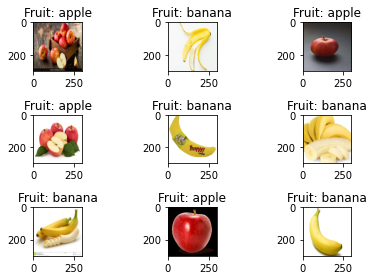

In [6]:
for i in range(9):
    plt.subplot(3,3,i+1)
    n = random.randint(0,239)
    plt.imshow(train_X[n,:,:])
    plt.title("Fruit: {}".format(train_Y[n]))
plt.tight_layout()

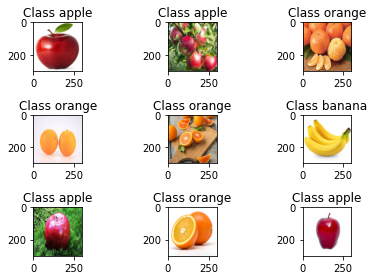

In [7]:
for i in range(9):
    plt.subplot(3,3,i+1)
    n = random.randint(0,59)
    plt.imshow(test_X[n,:,:])
    plt.title("Class {}".format(test_Y[n]))
plt.tight_layout()

# Data Preprocessing

In [8]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [9]:
train_Y[train_Y=='apple']=0
train_Y[train_Y=='banana']=1
train_Y[train_Y=='mixed']=2
train_Y[train_Y=='orange']=3

train_Y = train_Y.astype(int)
train_Y_one_hot = to_categorical(train_Y)

n = random.randint(0,239)
print('Original label:', train_Y[n])
print('After conversion to one-hot:', train_Y_one_hot[n])

Original label: 3
After conversion to one-hot: [0. 0. 0. 1.]


In [10]:
test_Y[test_Y=='apple']=0
test_Y[test_Y=='banana']=1
test_Y[test_Y=='mixed']=2
test_Y[test_Y=='orange']=3

test_Y = test_Y.astype(int)
test_Y_one_hot = to_categorical(test_Y)

n = random.randint(0,59)
print('Original label:', test_Y[n])
print('After conversion to one-hot:', test_Y_one_hot[n])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0.]


In [11]:
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=45)

In [12]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((192, 300, 300, 3), (48, 300, 300, 3), (192, 4), (48, 4))

# Model Training

In [13]:
batch_size = 40
epochs = 10
num_classes = 4

In [14]:
fruit_model = Sequential()
fruit_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(300,300,3)))
fruit_model.add(Conv2D(48, (3, 3), activation='relu'))
fruit_model.add(MaxPooling2D(pool_size=(2, 2)))
fruit_model.add(Dropout(0.25))
fruit_model.add(Flatten())
fruit_model.add(Dense(128, activation='relu'))
fruit_model.add(LeakyReLU(alpha=0.1))
fruit_model.add(Dropout(0.5))
fruit_model.add(Dense(num_classes, activation='softmax'))

In [15]:
fruit_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [16]:
fruit_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 296, 296, 48)      13872     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 48)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 148, 148, 48)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1051392)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               134578304 
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)              

In [17]:
fruit_train = fruit_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 192 samples, validate on 48 samples
Epoch 1/10
192/192 [==============================] - 31s 161ms/step - loss: 14.4797 - accuracy: 0.3750 - val_loss: 10.1769 - val_accuracy: 0.5000
Epoch 2/10
192/192 [==============================] - 28s 147ms/step - loss: 5.4480 - accuracy: 0.5000 - val_loss: 0.7699 - val_accuracy: 0.7292
Epoch 3/10
192/192 [==============================] - 32s 164ms/step - loss: 0.7427 - accuracy: 0.7396 - val_loss: 0.6001 - val_accuracy: 0.7292
Epoch 4/10
192/192 [==============================] - 31s 162ms/step - loss: 0.4463 - accuracy: 0.8854 - val_loss: 0.5603 - val_accuracy: 0.7917
Epoch 5/10
192/192 [==============================] - 31s 162ms/step - loss: 0.2996 - accuracy: 0.9219 - val_loss: 0.5428 - val_accuracy: 0.7500
Epoch 6/10
192/192 [==============================] - 31s 163ms/step - loss: 0.2380 - accuracy: 0.9271 - val_loss: 0.7286 - val_accuracy: 0.7708
Epoch 7/10
192/192 [==============================] - 31s 162ms/step - loss: 0.1791

In [18]:
test_eval = fruit_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.8336570978164672
Test accuracy: 0.800000011920929


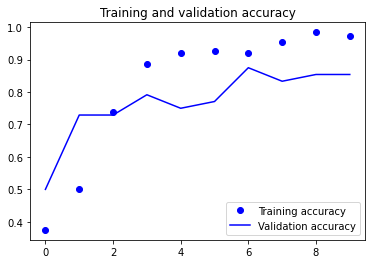

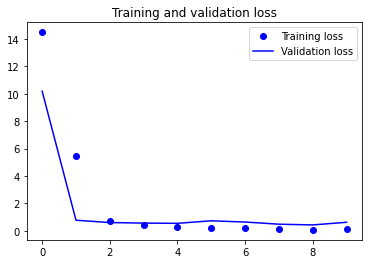

In [19]:
accuracy = fruit_train.history['accuracy']
val_accuracy = fruit_train.history['val_accuracy']
loss = fruit_train.history['loss']
val_loss = fruit_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Prediction

In [20]:
predicted_classes = fruit_model.predict(test_X)

In [21]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [22]:
predicted_classes.shape, test_Y.shape

((60,), (60,))

In [23]:
print('Predicted: ', predicted_classes)
print('Actual: ', test_Y)

Predicted:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 3 3 1 0 3 3 1 1 1 0
 3 2 0 1 0 1 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3]
Actual:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [24]:
correct = np.where(predicted_classes==test_Y)[0]
incorrect = np.where(predicted_classes!=test_Y)[0]
print('Predict correct:',len(correct))
print('Predict incorrect:',len(incorrect))

Predict correct: 48
Predict incorrect: 12


In [25]:
#new_model = load_model('fruit_model_3.h5py')

In [26]:
fruit_model.save("fruit_model_neurons_48.h5py")

In [27]:
#predicted_classes = new_model.predict(test_X)

In [28]:
#predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [29]:
# test_eval = new_model.evaluate(test_X, test_Y_one_hot, verbose=0)
# print('Test loss:', test_eval[0])
# print('Test accuracy:', test_eval[1])

In [30]:
confusion_matrix(test_Y, predicted_classes)

array([[19,  0,  0,  0],
       [ 2, 12,  0,  4],
       [ 2,  1,  1,  1],
       [ 0,  2,  0, 16]], dtype=int64)

In [31]:
# print('Predicted: ', predicted_classes)
# print('Actual: ', test_Y)

In [32]:
# correct = np.where(predicted_classes==test_Y)[0]
# incorrect = np.where(predicted_classes!=test_Y)[0]
# print('Predict correct:',len(correct))
# print('Predict incorrect:',len(incorrect))

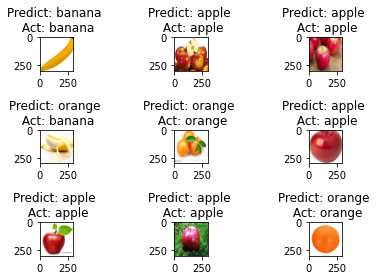

In [33]:
fruit_dict = {0:'apple', 1:'banana', 2:'mixed', 3:'orange'}
for i in range(9):
    plt.subplot(3,3,i+1)
    n = random.randint(0,59)
    plt.imshow(test_X[n,:,:])
    plt.title("Predict: {} \n Act: {}".format(fruit_dict[predicted_classes[n]], fruit_dict[test_Y[n]]))
plt.tight_layout()

# Experiment

In [34]:
# sample = []
# image=tf.keras.preprocessing.image.load_img('sample_2.jpg', color_mode='rgb', target_size= (300,300))
# image=np.array(image)
# sample.append(image)

In [35]:
# sample = np.array(sample)
# sample = sample.astype('float32')
# sample = sample / 255.
# sample.shape

In [36]:
# predicted_classes = new_model.predict(sample)
# predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
# predicted_classes

In [37]:
# plt.imshow(sample[0,:,:])
# plt.title("Predict: {}".format(fruit_dict[predicted_classes[0]]))